# Content

__1. Exploratory Visualization__  
__2. Data Cleaning__  
__3. Feature Engineering__  
__4. Modeling & Evaluation__  
__5. Ensemble Methods__  

HIGHLIGHT: ... 的部分是需要补全的部分, 请根据代码和注释对相应的部分进行补全 

In [1]:

# 加载数据处理分析，可视化等实验过程中可能用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## 忽视掉 一些 warning 提醒
warnings.filterwarnings('ignore')
## 设置可视化的风格 
plt.style.use('ggplot')

In [2]:
## 加载机器学习相关的库
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer as Imputer

In [3]:
## 加载机器学习相关的库
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
## 设置 panda 展示数据时的相关参数
pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [5]:
# 填写数据的路径并读取
train_path = "data/train.csv"
test_path = "data/test.csv"
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)

In [6]:
# 简单看下数据
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Exploratory Visualization

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

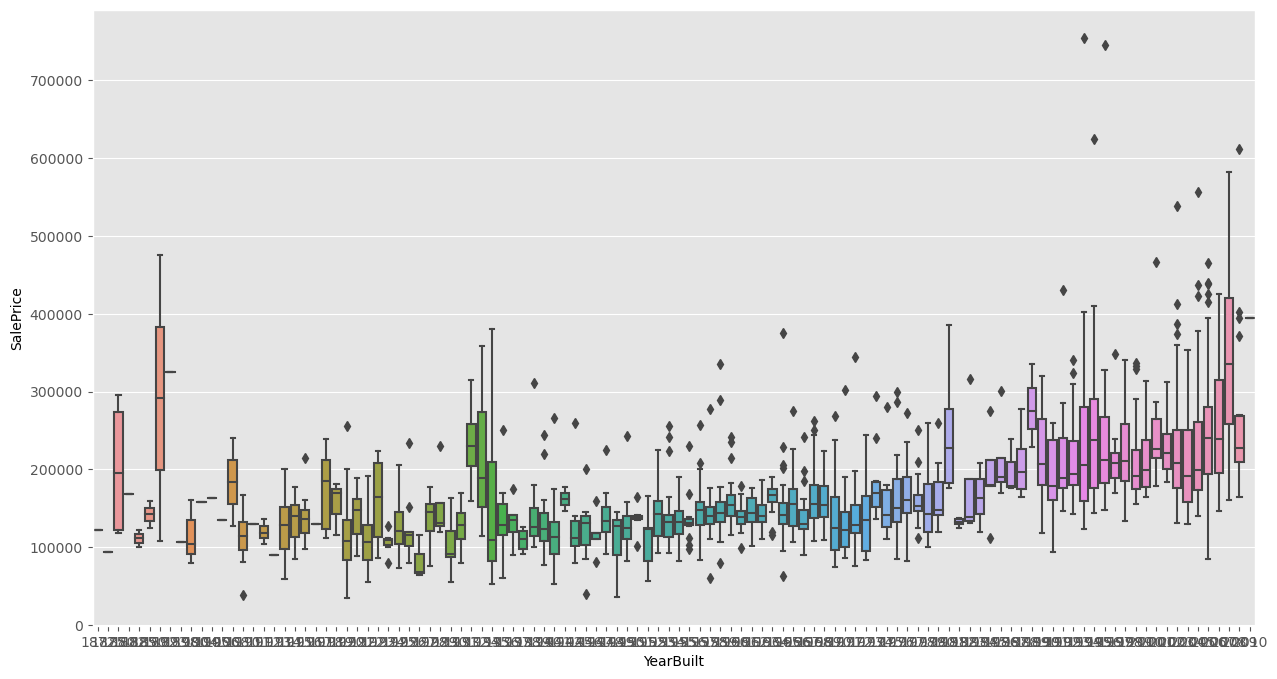

In [7]:
# train的属性有 YearBuilt, SalePrice，可以用 train.YearBuilt 和 train.SalePrice 来获取
# 新住宅是否比老住宅均价更高？

plt.figure(figsize=(15,8))
sns.boxplot(x=train.YearBuilt, y=train.SalePrice)  # 可以按照年份画出价格的箱线图

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

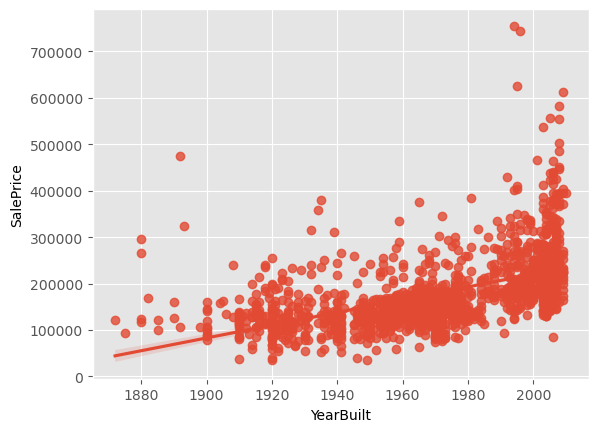

In [8]:
sns.regplot(x=train.YearBuilt, y=train.SalePrice) # 可以按照年份画出价格的线性图

+ __好像年份也是和价格有关系的，后续可以把年份也作为一项特征.__

# Data Cleaning

In [9]:
# HIGHLIGHT: 在数据清洗阶段注重理解背后的逻辑，我们会在删除和填充等做法各举一个例子，然后引导大家分析其他的特征。

### Deleting Data

(0.0, 800000.0)

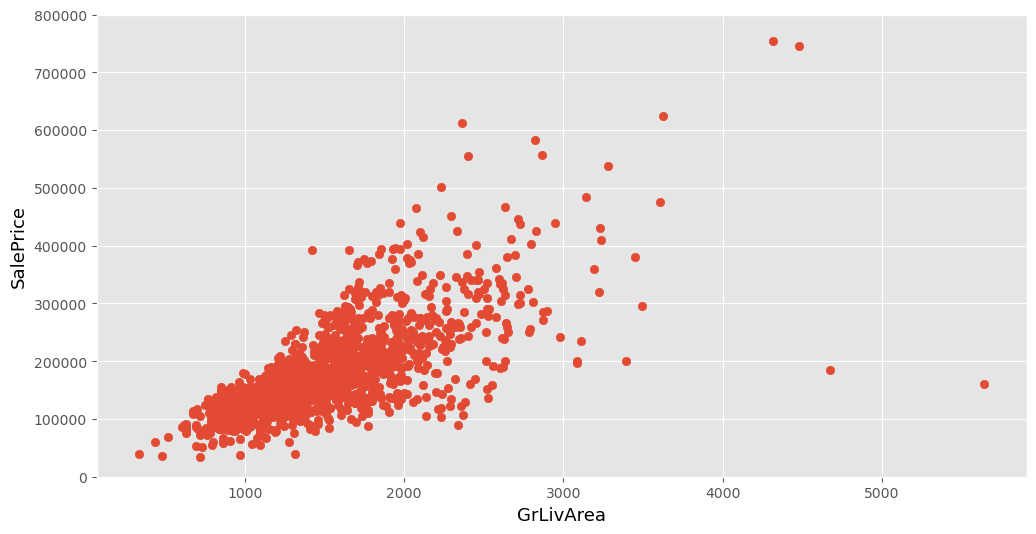

In [10]:
# 查看训练集数据的其他属性比如 GrLivArea 和 SalePrice 的关系
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice) # 可以按照GrLivArea的大小来画出价格的散点图
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

+ __As is shown in the kernels above, the bottom right two two points with extremely large GrLivArea are likely to be outliers. So we delete them.__

In [11]:
# GrLivArea字段过大的值可能是离群点, 可以通过删除训练样本的方式处理

In [12]:
## 丢掉 GrLivArea 大于 4000 且 SalePrice 小于 300000 的点
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True) 

In [13]:
# 初步了解数据后，我们把训练数据和测试数据拼在一起方便后续处理
# 注意 训练集在前
full=pd.concat([train, test], ignore_index=True)

In [14]:
## 去掉 id 这一列的属性 查看数据的形状
full.drop(['Id'],axis=1, inplace=True)
full.shape

(2917, 80)

### Missing Data

In [15]:
## 查看数据是否有缺失
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)  

# 我们将对缺失的数据进行补充

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [16]:
# 对于部分字段的缺失值, 可以通过填充中位数处理, 例如 “LotFrontage” 
# Let's first imput the missing values of LotFrontage based on the median of LotArea and Neighborhood.

In [17]:
# 我们对整个数据根据 Neighborhood 进行聚类, 并 计算 LotFrontage  均值 (mean), 中值 (median), 和数目 
# 并查看结果
 
full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count']) 

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        46.900000   43.0    20
Blueste        27.300000   24.0    10
BrDale         21.500000   21.0    30
BrkSide        55.789474   51.0    95
ClearCr        88.150000   80.5    20
CollgCr        71.336364   70.0   220
Crawfor        69.951807   70.0    83
Edwards        65.153409   64.5   176
Gilbert        74.207207   64.0   111
IDOTRR         62.241379   60.0    87
MeadowV        25.606061   21.0    33
Mitchel        75.144444   74.0    90
NAmes          75.210667   73.0   375
NPkVill        28.142857   24.0    21
NWAmes         81.517647   80.0    85
NoRidge        91.629630   89.0    54
NridgHt        84.184049   92.0   163
OldTown        61.777293   60.0   229
SWISU          59.068182   60.0    44
Sawyer         74.551020   72.0    98
SawyerW        70.669811   67.0   106
Somerst        64.549383   72.5   162
StoneBr        62.173913   60.0    46
Timber         81.157895   82.0    57
Veenker        72.000000   80.0    16

In [18]:
 # 由于LotArea是一个连续的特性, 我们使用qcut函数将其划分为10个部分

full["LotAreaCut"] = pd.qcut(full.LotArea, q=10)

In [19]:
# 我们根据 LotAreaCut 对数据进行聚类，计算 LotFrontage 均值, 中值, 和 数目
# 并查看结果
full.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count']) 

LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 4921.8]    35.741036   34.0   251
(4921.8, 7007.2]      55.460674   52.0   267
(7007.2, 7949.0]      62.959839   62.0   249
(7949.0, 8740.4]      67.113725   65.0   255
(8740.4, 9452.0]      69.959184   70.0   245
(9452.0, 10148.8]     73.988235   75.0   255
(10148.8, 11000.0]    73.636364   75.0   253
(11000.0, 12196.8]    83.371681   82.0   226
(12196.8, 14285.8]    84.973684   85.0   228
(14285.8, 215245.0]   92.846535   90.0   202

In [20]:
# 根据 LotAreaCut 和 Neighborhood 对数据进行聚类, 对 LotFrontage 空的值填充 LotFrontage 的中值 

full['LotFrontage']=full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [21]:
# 由于LotArea和Neighborhood的某些组合不可用, 因此我们仅使用LotAreaCut来进行聚类, 对LotFrontage填充 LotFrontage 的 中值

full['LotFrontage']=full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

+ __Then we filling in other missing values according to data_description.__

In [22]:
# 如果我们仔细观察data_description里面的内容，就会发现很多缺失值都有迹可寻，比如PoolQC, 表示游泳池的质量，如果这个值缺失, 就代表这套房子没有游泳池，因此用 None 来填补
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    full[col].fillna("None", inplace=True)

In [23]:
### 下面这些多为表示XX面积，比如 TotalBsmtSF 表示的是地下室面积，如果一个房间，没有地下室，那就可以使用 0 来填充
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

# fill in with mode
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

+ __And there is no missing data except for the value we want to predict !__

In [24]:
## 检查是否还有其他需要填充的数据呢？

full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

In [25]:
full["SalePrice"].fillna(0, inplace=True)
train.drop(train[(train["SalePrice"]<5)].index,inplace=True) 

# Feature Engineering

In [26]:
# 部分类别特征, 可以通过映射成数值特征来完成转换, 如下所示
# 换句话说，我们可以通过设置一个映射函数, 把部分类别特征转化为数值特征, 这样可以很方便后续我们进行预测

In [27]:
# 下面是相关的类别特征 (通常会以字符串记录), 所以我们将其转化为字符串类型
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    full[col]=full[col].astype(str)

In [28]:
# 问题就转化为了如何构造这个映射函数呢？ 
# 我们可以根据一个特性按SalePrice分组, 并根据平均值和中值对其进行排序
# 以 MSSubClass 为例, 我们根据 MSSubClass 进行聚类，计算 SalePrice 的统计均值, 中位数等信息
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

<bound method DataFrame.info of      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0            60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
1            20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8   
2            60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
3            70       RL         60.0     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7          

+ __根据上面的计算结果，我们设计了如下的映射函数__  

                '180' : 1
                '30' : 2   '45' : 2
                '190' : 3, '50' : 3, '90' : 3,
                '85' : 4, '40' : 4, '160' : 4
                '70' : 5, '20' : 5, '75' : 5, '80' : 5, '150' : 5
                '120': 6, '60' : 6

+ __你也可以根据你自己的直觉和偏好来设计出你自己的映射函数，但是必须符合逻辑，否则模型很难从这一特征中学到有价值的信息__  

In [31]:
# 得到映射函数, 我们用代码实现这个构造函数
full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
full.info

<bound method DataFrame.info of      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0            60       RL         65.0     8450   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
1            20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8   
2            60       RL         68.0    11250   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5   
3            70       RL         60.0     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7          

+ __我们可以参考上述过程继续构造下面的映射函数，我还在特性前面添加了一个小“o”，以便保留原始特性，以便稍后使用 get_dummies 编码函数.__

In [ ]:
### 鼓励大家尝试参考上述方案构造映射函数，填空的部分较为简单
### 我也把参考的映射函数放在代码的最后
    
def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [49]:
map_values()

'Done!'

In [50]:
# 去掉 LotAreaCut 和 SalePrice 这两个 unwanted value
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop(['SalePrice'],axis=1,inplace=True)

## Pipeline

+ __接下来我们可以建立一个管道。 拥有管道后，可以很方便地试验不同的功能组合.__

In [51]:
# 按照我们最开始的观察，year 有关的变量是和价格有关系的，因此我们需要对三个和 Year 有关的变量进行编码
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [52]:
# 抽取特征的斜度, 对于符合斜度要求的特征应用 log1p, 然后使用 get_dummies函数 进行独热编码
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x)) 
        """
        Examples
        skew(x) Compute the skewness of a data set.
        For normally distributed data, the skewness should be about 0. For
        unimodal continuous distributions, a skewness value > 0 means that
        there is more weight in the right tail of the distribution.
        --------
        >>> from scipy.stats import skew
        >>> skew([1, 2, 3, 4, 5])
        0.0
        >>> skew([2, 8, 0, 4, 1, 9, 9, 0])
        0.2650554122698573
        """
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [53]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [54]:
full.shape

(2917, 101)

In [55]:
# save the original data for later use
full2 = full.copy()
data_pipe = pipe.fit_transform(full2)
data_pipe.shape

(2917, 405)

In [ ]:
### 你能理清楚为什么 full.shape 是怎样一步一步变化到 data_pipe的shape的吗？
# 可以画一个流程图，帮助自己理解整个过程
# (i,j)-> action -> (m,n) -> action ->...... 

In [56]:
data_pipe.head() # 展示头几个数据

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,oMSSubClass,oMSZoning,oNeighborhood,oCondition1,oBldgType,oHouseStyle,oExterior1st,oMasVnrType,oExterQual,oFoundation,oBsmtQual,oBsmtExposure,oHeating,oHeatingQC,oKitchenQual,oFunctional,oFireplaceQu,oGarageType,oGarageFinish,oPavedDrive,oSaleType,oSaleCondition,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr

+ __因为咱们的数据里面还有其他异常值，所以我们需要某些特定的函数来进行缩放比如：robustscaler .__

In [57]:
scaler = RobustScaler()  # 对数据进行缩放

In [82]:


# 首先对训练数据进行缩放，根据对训练数据拟合的结果然后再对测试数据进行缩放

n_train=train.shape[0] #获得有多少条训练数据

X = data_pipe[:n_train] # 获得训练数据
test_X = data_pipe[n_train:] # 获得测试数据
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice) # 对于 y 进行人为定义log 进行缩放 
test_X_scaled = scaler.transform(test_X) # 对测试数据进行缩放
#print(test_X_scaled)

## Feature Selection

+ __上面的特征工程还不够，所以我们需要更多.__   
+ __组合不同的特征通常是一个好方法，但我们不知道应该选择什么特征。 幸运的是，有些模型可以提供特征选择，这里我使用 Lasso，但你可以自由选择 Ridge、RandomForest 或 GradientBoostingTree.__

In [83]:
# 一般可以先构造线性模型，分析权重来判断特征的重要性

lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled, y_log)  # 用lasso 拟合 缩放后的训练数据 和 对应的 y 值 

Lasso(alpha=0.001)

In [74]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [84]:
FI_lasso.sort_values("Feature Importance",ascending=False)  # 利用Lasso计算出一个特征重要性的分数

,Feature Importance
GrLivArea,1.088601e-01
OverallQual,1.025196e-01
2ndFlrSF,7.424276e-02
YearBuilt,6.883425e-02
1stFlrSF,5.981159e-02
Functional_Typ,5.187783e-02
TotalBsmtSF,5.027809e-02
Neighborhood_Crawfor,4.991413e-02
OverallCond,4.552613e-02
oNeighborhood,4.432890e-02


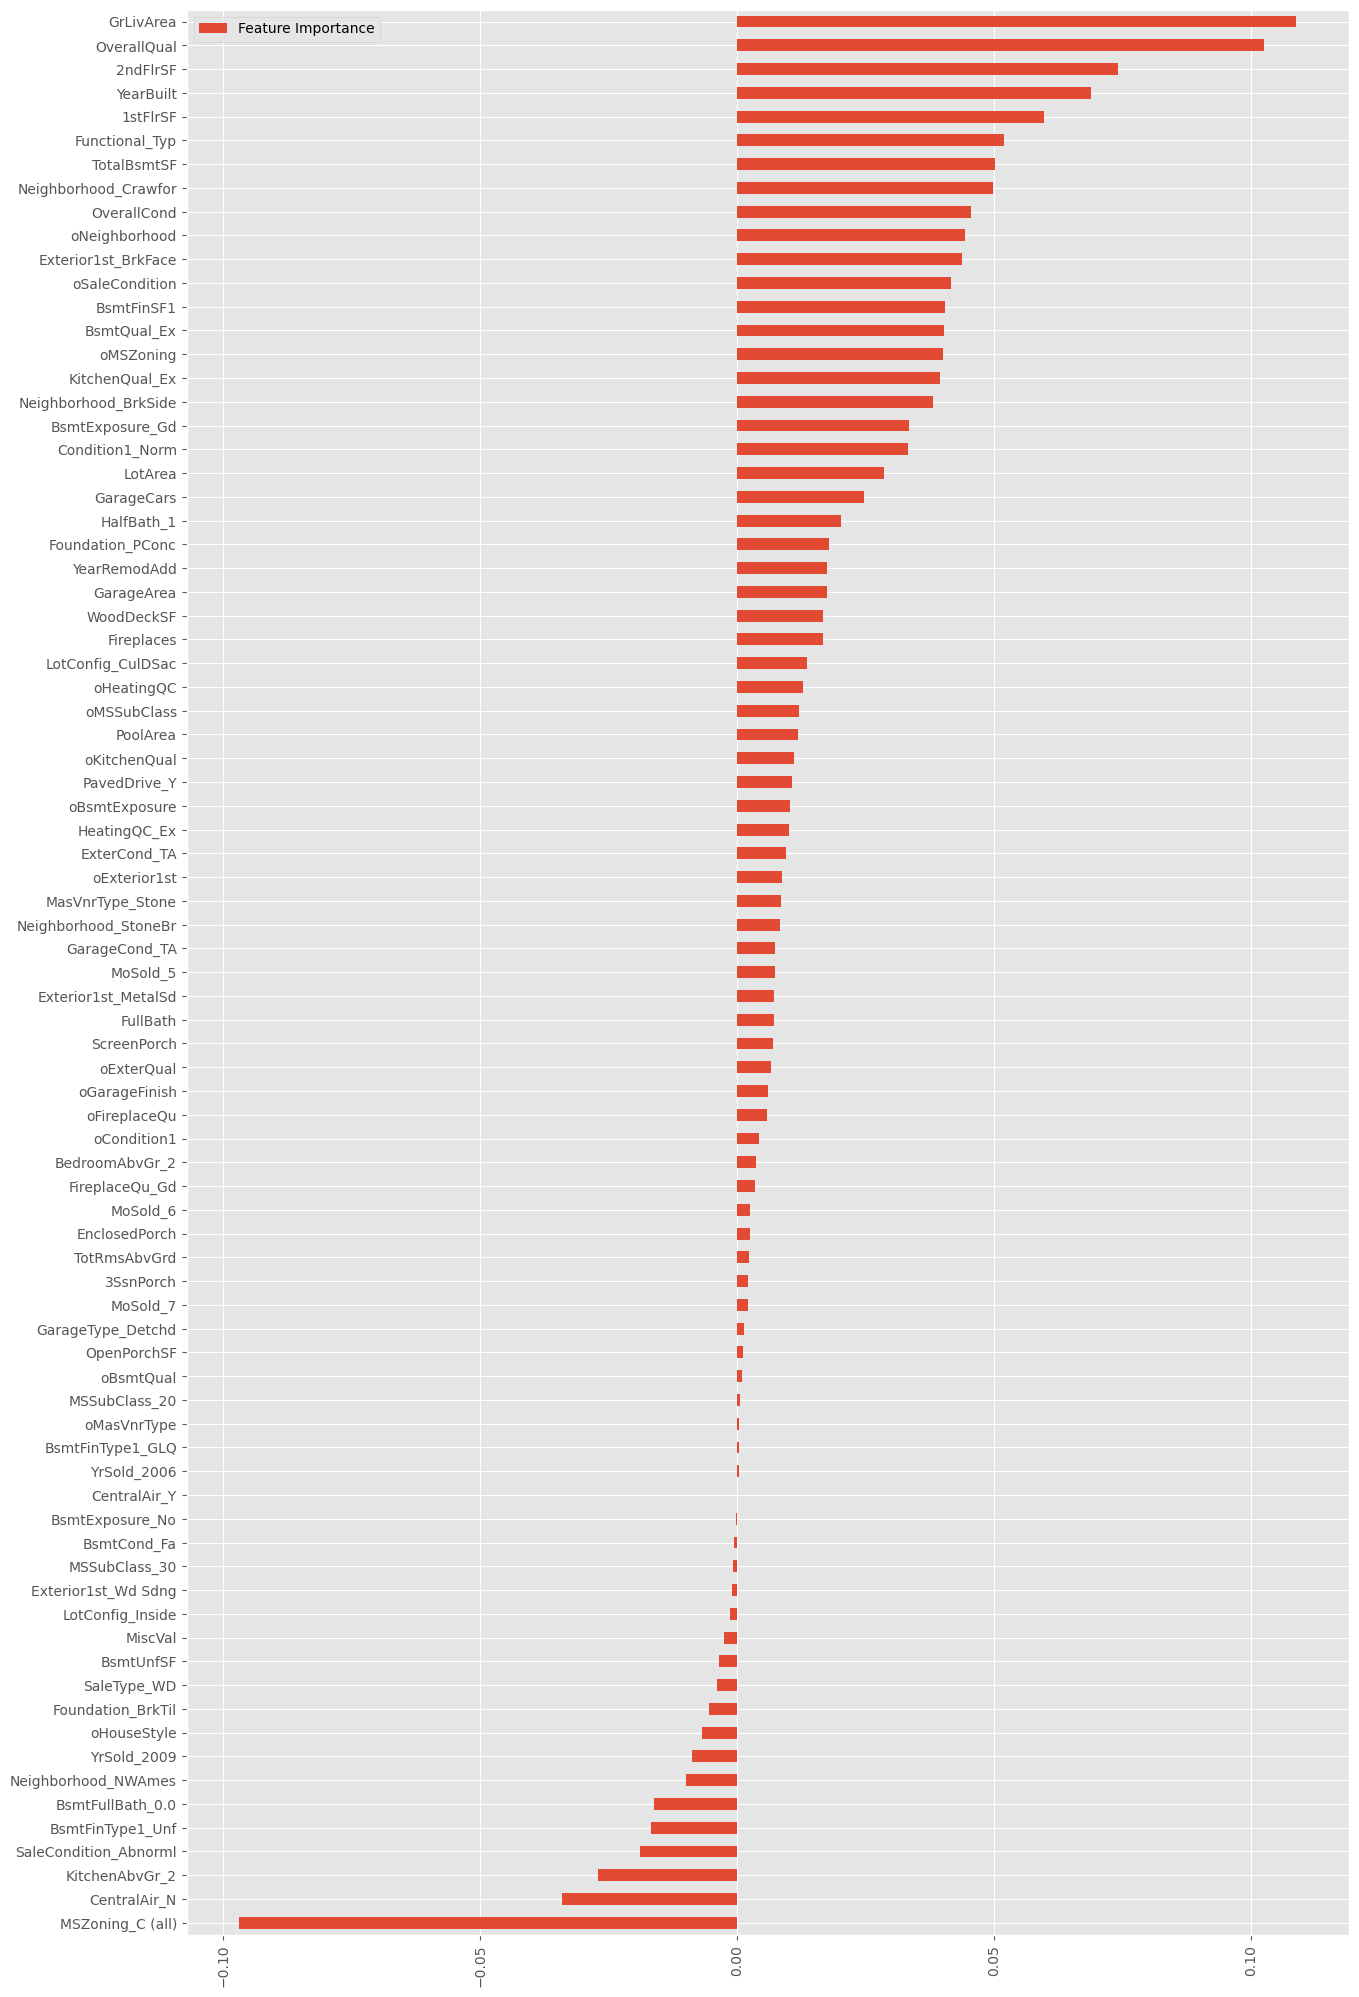

In [76]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()  ### 更直观的可视化一下

+ __基于上述的可视化，我们还可以向管道中添加一些特征.__

In [85]:

# 根据特征的重要性，可以通过加减乘等方法构建新的特征
# 我也把参考的构建方案放在了代码的最后

class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
                       
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

            ## here you add your new feature
            return X

+ __By using a pipeline, you can quickily experiment different feature combinations.__

In [86]:
## 再一次完善我们的 pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [ ]:
## 思考： 我们设计的这些特征（原始的和新增加的）是否存在着冗余呢？ 这些冗余（特征高度相关，导致了多重共线性）可能不利于模型更好的拟合 

## PCA

In [ ]:
## PCA 可以解除这些特征的关联！

+ __在PCA中使用与原始数据中大致相同的维度.__

In [87]:
full_pipe = pipe.fit_transform(full)

In [88]:
full.shape, data_pipe.shape, full_pipe.shape

((2917, 107), (2917, 405), (2917, 411))

In [ ]:
## 想想为什么特征维度也不一样，是什么导致的呢？和data_pipe的特征维度之间又有哪些不同呢？

In [89]:
## 类似的，对数据进行缩放
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(X_scaled)

In [90]:
pca = PCA(n_components=410)  # pca 降维，去掉特征间的冗余

In [92]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [93]:
X_scaled.shape, test_X_scaled.shape

((1458, 410), (1458, 410))

# Modeling & Evaluation

In [94]:
# define cross validation strategy 定义一个交叉验证的策略
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))  # 5折交叉验证
    return rmse

## 五折交叉验证： 把数据平均分成5等份，每次实验拿一份做测试，其余用做训练。

+ __我们选择了 13 个模型并使用 5 折交叉验证来评估这些模型.__

Models include:

+ LinearRegression (LinearRegression)
+ Ridge (Ridge)
+ Lasso (Lasso)
+ Random Forrest (RandomForestRegressor)
+ Gradient Boosting Tree (GradientBoostingRegressor)
+ Support Vector Regression (SVR)
+ Linear Support Vector Regression (LinearSVR)
+ ElasticNet (ElasticNet)
+ Stochastic Gradient Descent (SGDRegressor)
+ BayesianRidge (BayesianRidge)
+ KernelRidge (KernelRidge)
+ ExtraTreesRegressor (ExtraTreesRegressor)
+ XgBoost (XGBRegressor)

In [104]:
## 对这些模型进行初始化
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(), GradientBoostingRegressor(), SVR(), LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3), BayesianRidge(), KernelRidge (alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()] 

In [106]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 44889310600.107201, 48996200222.3451
Ridge: 0.117563, 0.0093
Lasso: 0.131376, 0.0038
RF: 0.140644, 0.0055
GBR: 0.131196, 0.0040
SVR: 0.134376, 0.0089
LinSVR: 0.120743, 0.0112
Ela: 0.111569, 0.0056
SGD: 0.147950, 0.0104
Bay: 0.111306, 0.0068
Ker: 0.110485, 0.0058
Extra: 0.135093, 0.0054
Xgb: 0.145736, 0.0098


+ __接下来我们进行一些超参数调整。 首先定义一个grid search方法.__

In [ ]:
## 网格搜索 可以简单理解为：对超参数空间进行等分或者不等分，遍历所有可能的值

In [107]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

### Lasso

In [113]:
grid(Lasso()).grid_get(X_scaled, y_log, {'alpha': [0.0006,0.00065,0.0007,0.00075,0.0008,0.00085,0.0009],'max_iter':[10000]})

## [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008] 就是需要搜索的超参数，下面同理

{'alpha': 0.0006, 'max_iter': 10000} 0.11176821629007153
                                  params  mean_test_score  std_test_score
0   {'alpha': 0.0006, 'max_iter': 10000}         0.111768        0.001219
1  {'alpha': 0.00065, 'max_iter': 10000}         0.111813        0.001191
2   {'alpha': 0.0007, 'max_iter': 10000}         0.111874        0.001171
3  {'alpha': 0.00075, 'max_iter': 10000}         0.111930        0.001160
4   {'alpha': 0.0008, 'max_iter': 10000}         0.112004        0.001147
5  {'alpha': 0.00085, 'max_iter': 10000}         0.112099        0.001138
6   {'alpha': 0.0009, 'max_iter': 10000}         0.112215        0.001129


### Ridge

In [115]:
grid(Ridge()).grid_get(X_scaled, y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.11100926767437913
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.111009        0.001361
1  {'alpha': 40}         0.111045        0.001341
2  {'alpha': 45}         0.111105        0.001324
3  {'alpha': 50}         0.111182        0.001310
4  {'alpha': 55}         0.111272        0.001299
5  {'alpha': 60}         0.111374        0.001289
6  {'alpha': 65}         0.111483        0.001280
7  {'alpha': 70}         0.111600        0.001273
8  {'alpha': 80}         0.111849        0.001260
9  {'alpha': 90}         0.112113        0.001250


### SVR

In [116]:
grid(SVR()).grid_get(X_scaled, y_log, {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 15, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.10858382655030284
                                                           params  mean_test_score  std_test_score
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.109401        0.001694
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.108922        0.001740
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.109357        0.001702
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.108918        0.001757
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.109291        0.001705
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.108813        0.001758
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.109241        0.001708
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.108806        0.001772
8   {'C': 13, 'epsilon': 0.

### Kernel Ridge

In [117]:
param_grid={'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}
grid(KernelRidge()).grid_get(X_scaled, y_log, param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.10904017945523926
                                                               params  mean_test_score  std_test_score
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.109183        0.001365
1     {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.109040        0.001402
2   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}         0.109196        0.001449
3   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.109881        0.001334
4     {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.109286        0.001355
5   {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'}         0.109189        0.001392
6   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'}         0.110709        0.001320
7     {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'}         0.109679      

### ElasticNet

In [118]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})

{'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000} 0.11161356134944593
                                                    params  mean_test_score  std_test_score
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter': 10000}         0.116953        0.002147
1    {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter': 10000}         0.116509        0.002105
2    {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter': 10000}         0.113929        0.001858
3    {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter': 10000}         0.112724        0.001620
4    {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter': 10000}         0.112096        0.001426
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter': 10000}         0.115271        0.002030
6    {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter': 10000}         0.114821        0.001988
7    {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter': 10000}         0.112662        0.001625
8    {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000}         0.111884        0.001356
9    {

# Ensemble Methods 

In [119]:
## 对模型进行集成。
## 我们将多个表现较好的模型进行集成，这样可以进一步的提升性能。

### Weight Average

+ __根据权重对基础模型进行平均.__

In [120]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        for i in X:
            for
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [121]:
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [122]:
# assign weights based on their gridsearch score
# 根据他们的网格搜索 给出的测试分数 分配权重
# 我也把参考权重放在代码的最后，鼓励大家自己去探索，知其然，知其所以然
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [123]:
weight_avg = AverageWeight(mod = [lasso, ridge, svr, ker,ela, bay],weight=[w1,w2,w3,w4,w5,w6])

In [124]:
rmse_cv(weight_avg,X_scaled,y_log),  rmse_cv(weight_avg,X_scaled,y_log).mean()

(array([0.10479639, 0.11092017, 0.12020986, 0.10051926, 0.10642309]),
 0.10857375476185296)

+ __但是如果我们只对两个最好的模型进行平均，我们会获得更好的交叉验证分数.__

In [125]:
weight_avg = AverageWeight(mod = [svr, ker],weight=[0.5,0.5])

In [126]:
rmse_cv(weight_avg,X_scaled,y_log),  rmse_cv(weight_avg,X_scaled,y_log).mean()

(array([0.10311093, 0.1104915 , 0.11963056, 0.09888851, 0.10507924]),
 0.10744014864842757)

In [ ]:
## 可见在对模型的预测结果进行加权平均的时候，选择什么模型作为我们的基础模型很重要！

## Stacking

+ __除了正常的堆叠外，还添加了“get_oof”方法，可将堆叠生成的特征与原始特征结合起来.__

In [127]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

+ __运行这个方法有点慢，因为这个过程很复杂. __

In [128]:
# must do imputer first, otherwise stacking won't work.
# 用于完成缺失值的插补转换器
a = Imputer().fit_transform(X_scaled)
b = Imputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [129]:
stack_model = stacking(mod=[lasso,ridge, svr, ker,ela, bay], meta_model=ker)

In [130]:
print(rmse_cv(stack_model,a,b))
print(rmse_cv(stack_model,a,b).mean())

[0.10394367 0.10957883 0.11982967 0.09827876 0.10483673]
0.10729353195970048


+ __接下来我们提取stacking生成的特征，然后与原始特征结合.__

In [131]:
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)  # test_X_scale 的 也需要

In [132]:
X_train_stack.shape, a.shape  # 分析 shape 变化的状态轨迹

((1458, 6), (1458, 410))

In [137]:
X_train_add = np.hstack((X_scaled, X_train_stack)) # 和训练集的原始特征在特征维度拼接 注意 原始特征在前

In [139]:
X_test_add = np.hstack((test_X_scaled, X_test_stack)) # 和测试集的原始特征在特征维度拼接

In [140]:
X_train_add.shape, X_test_add.shape

((1458, 416), (1458, 416))

In [141]:
print(rmse_cv(stack_model,X_train_add,b))
print(rmse_cv(stack_model,X_train_add,b).mean())

[0.09772621 0.10350291 0.11193563 0.09659683 0.10001954]
0.10195622578511325


+ __甚至可以在获得“X_train_stack”后对您的元模型进行参数调优，或者结合原始特征进行调参, 可以改进的地方还有很多, 有兴趣的同学可以自行探索。__

In [ ]:
### 参考映射函数

def map_values():
    full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [ ]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [ ]:
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2